# Exercise 5: Classification Tree

---

## House Prices - Advanced Regression Techniques

Link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [41]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [42]:
houseData = pd.read_csv('train.csv')

Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N.

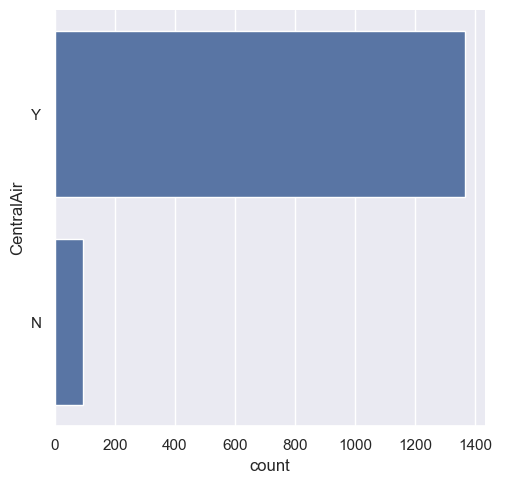

In [43]:
sb.catplot(y = "CentralAir", data = houseData, kind = "count")

Plot houseData['CentralAir'] against houseData['SalePrice'] using boxplot, and note the strong relationship.

<Axes: xlabel='TotalBsmtSF', ylabel='CentralAir'>

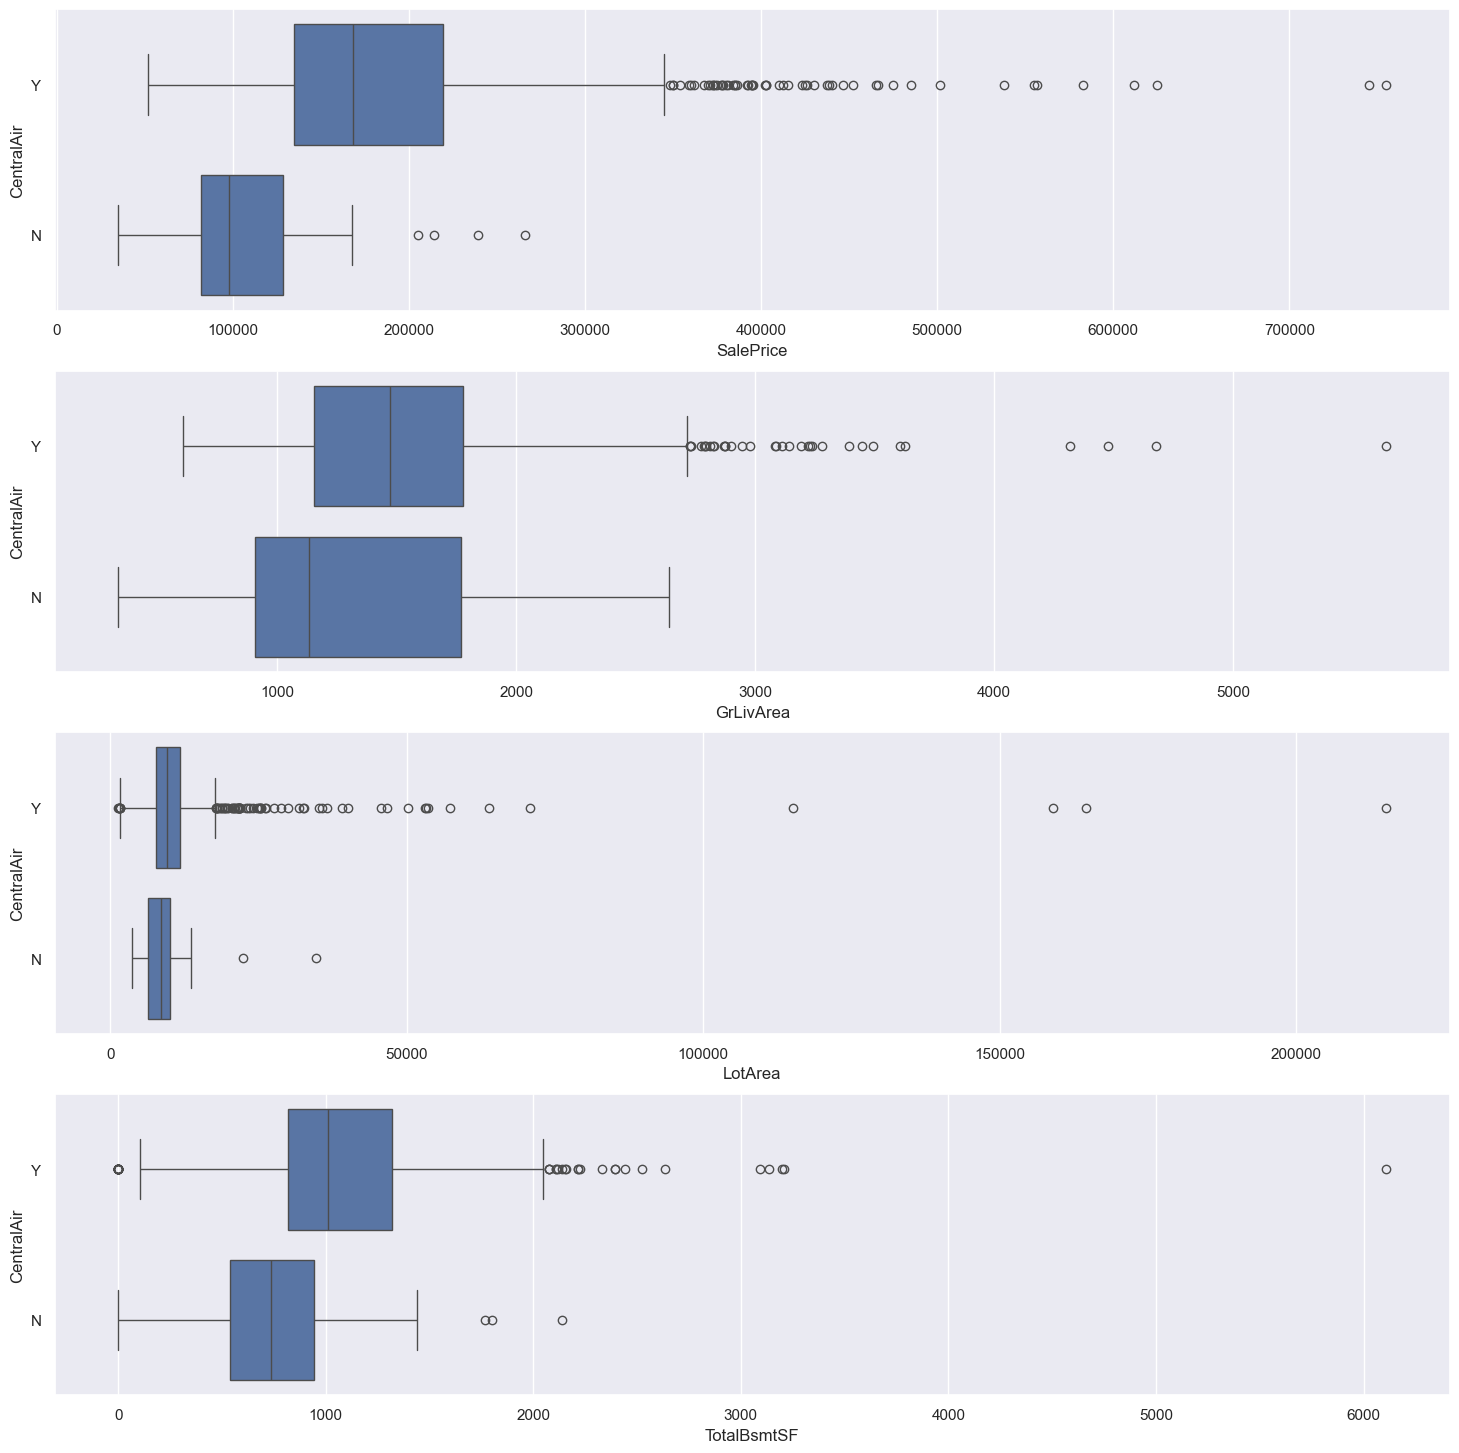

In [60]:
f, axes = plt.subplots(4, 1, figsize=(18, 18))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = houseData, orient = "h", ax=axes[0])
sb.boxplot(x = "GrLivArea", y = "CentralAir", data = houseData, orient = "h", ax=axes[1])
sb.boxplot(x = "LotArea", y = "CentralAir", data = houseData, orient = "h", ax=axes[2])
sb.boxplot(x = "TotalBsmtSF", y = "CentralAir", data = houseData, orient = "h", ax=axes[3])

You may also want to check the mutual relationship by plotting the two variables using a swarmplot.

<Axes: xlabel='TotalBsmtSF', ylabel='CentralAir'>

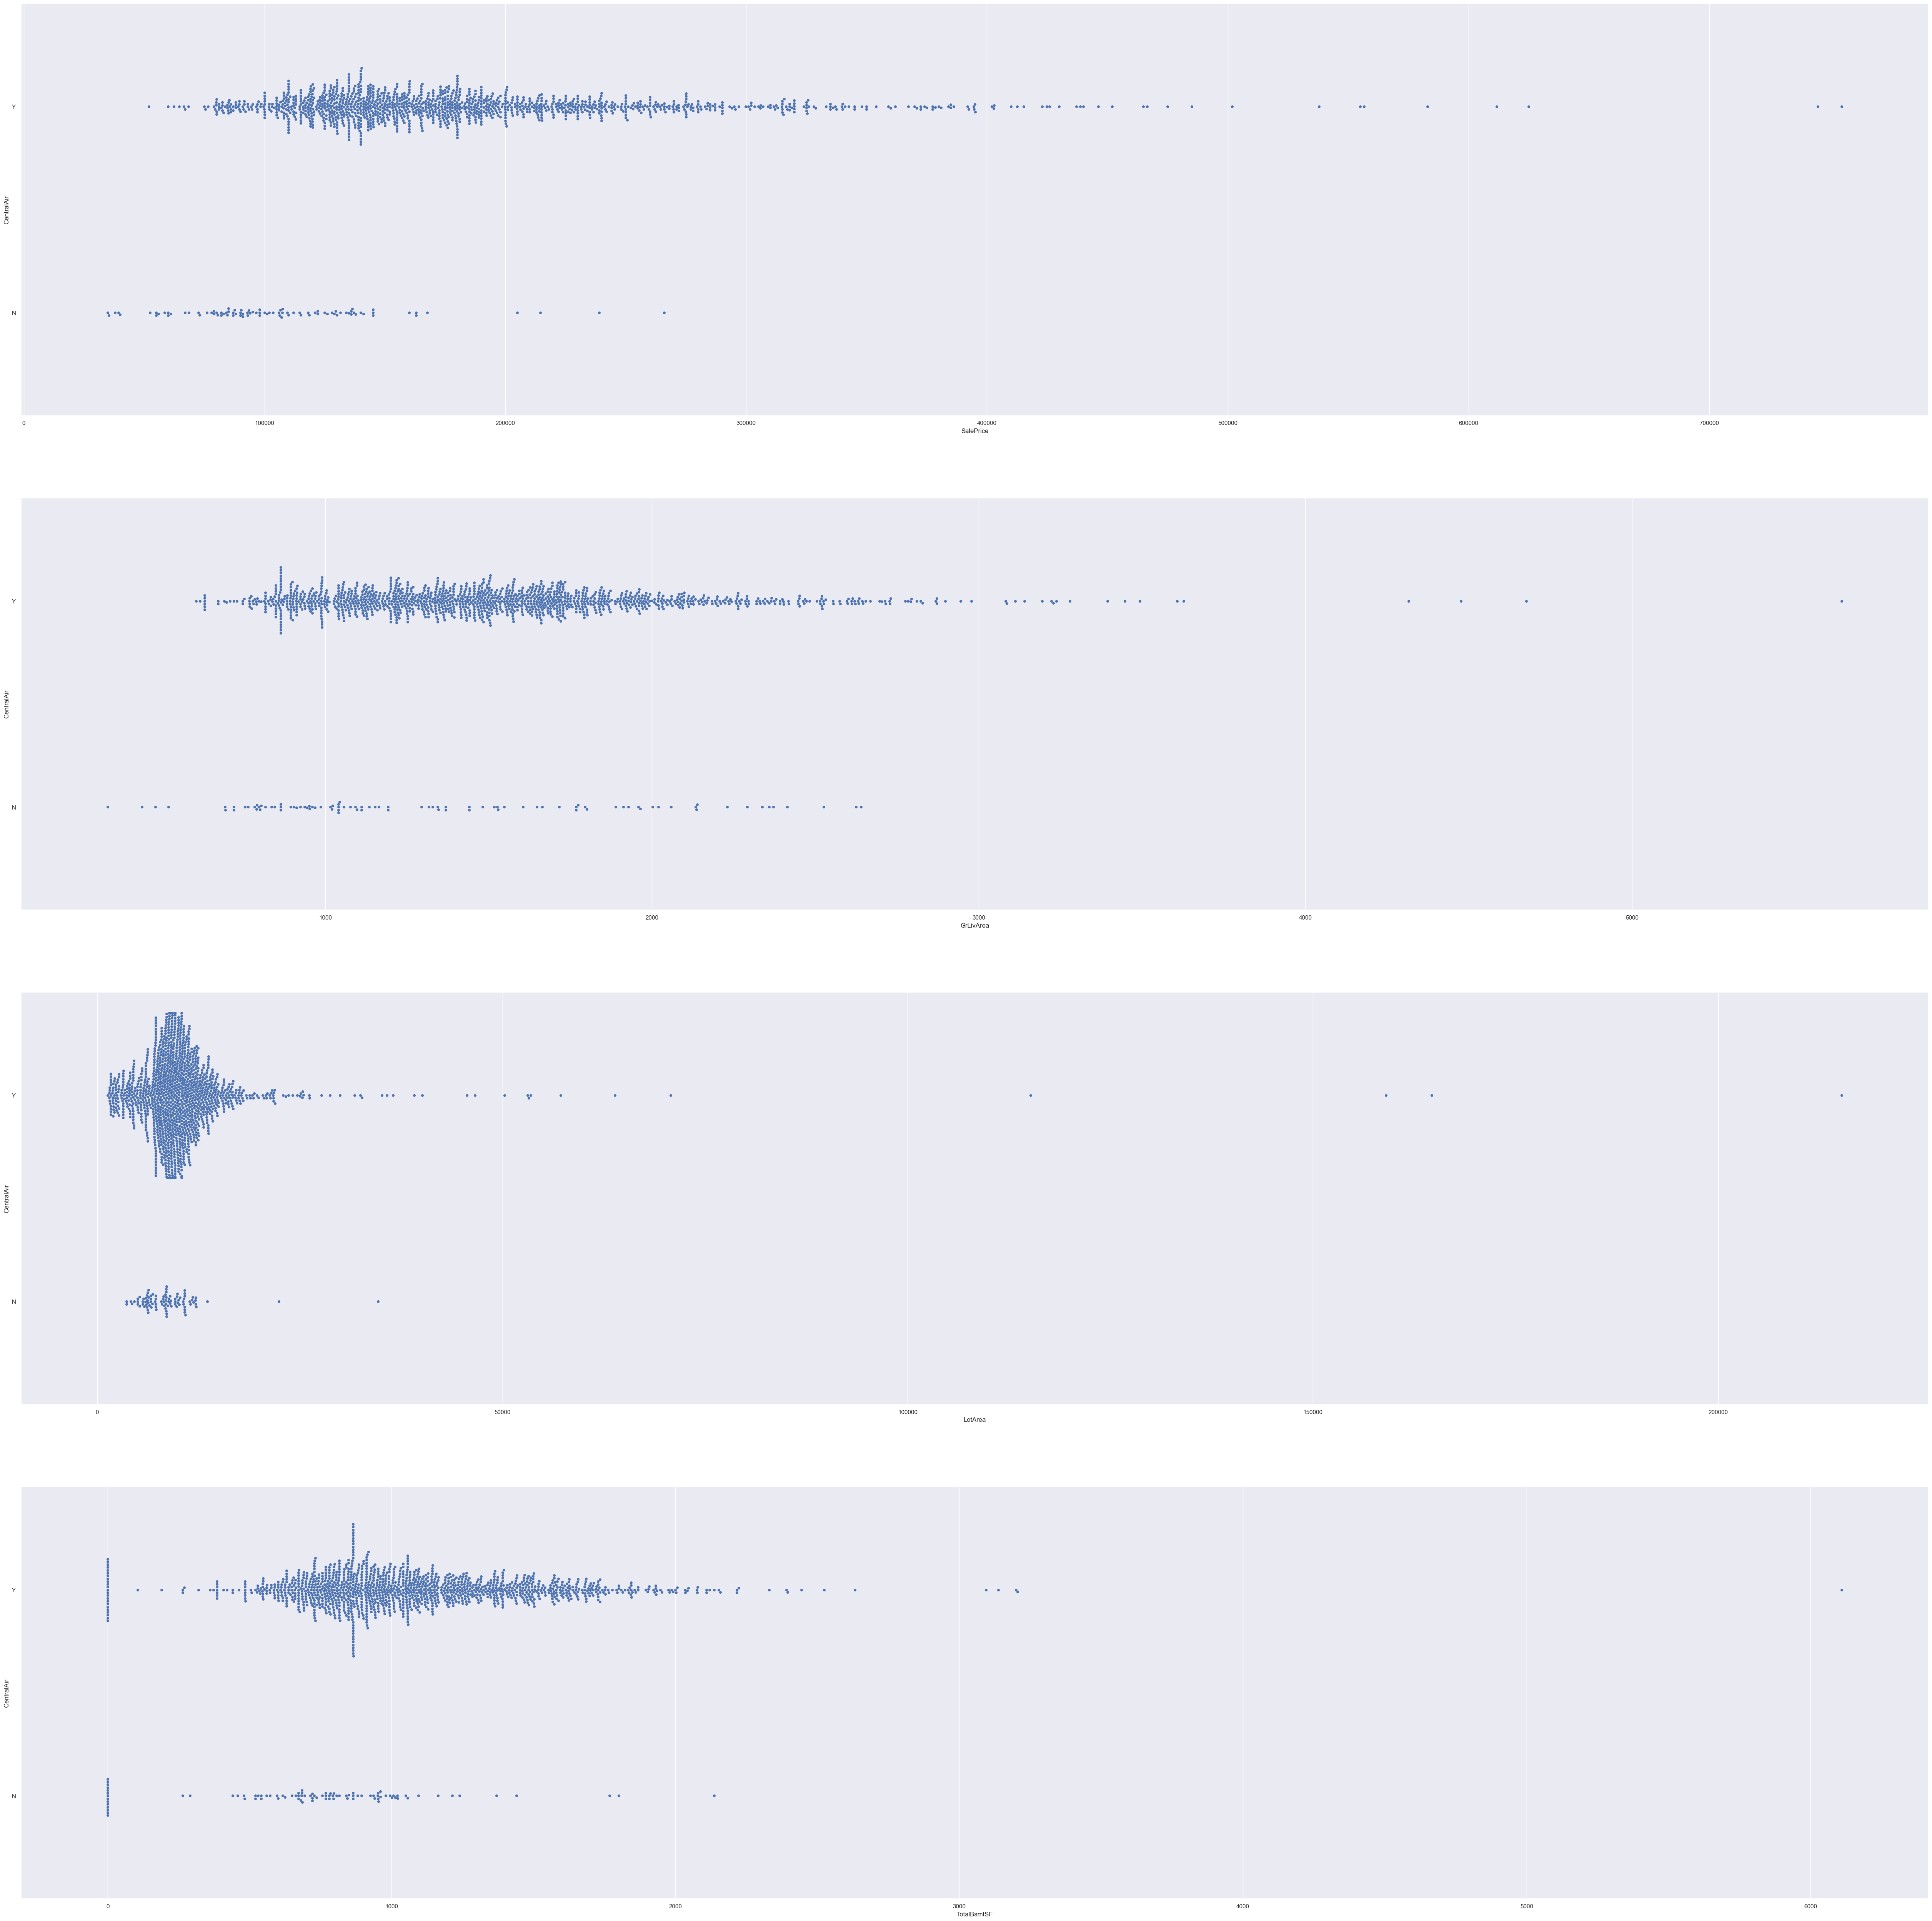

In [45]:
f, axes = plt.subplots(4, 1, figsize=(64, 64))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = houseData, orient = "h", ax=axes[0])
sb.swarmplot(x = "GrLivArea", y = "CentralAir", data = houseData, orient = "h", ax=axes[1])
sb.swarmplot(x = "LotArea", y = "CentralAir", data = houseData, orient = "h", ax=axes[2])
sb.swarmplot(x = "TotalBsmtSF", y = "CentralAir", data = houseData, orient = "h", ax=axes[3])

Import Classification Tree model from Scikit-Learn

In [46]:
from sklearn.tree import DecisionTreeClassifier

Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows).

In [47]:
houseData_train, houseData_test = houseData[:1100], houseData[-360:]

print("Train Set :", houseData_train.shape)
print("Test Set  :", houseData_test.shape)

Train Set : (1100, 81)
Test Set  : (360, 81)


Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables. 

In [48]:
y_train = pd.DataFrame(houseData_train['CentralAir'])
XSP_train = pd.DataFrame(houseData_train['SalePrice'])
XGLA_train = pd.DataFrame(houseData_train['GrLivArea'])
XLA_train = pd.DataFrame(houseData_train['LotArea'])
XTBSF_train = pd.DataFrame(houseData_train['TotalBsmtSF'])

y_test = pd.DataFrame(houseData_test['CentralAir'])
XSP_test = pd.DataFrame(houseData_test['SalePrice'])
XGLA_test = pd.DataFrame(houseData_test['GrLivArea'])
XLA_test = pd.DataFrame(houseData_test['LotArea'])
XTBSF_test = pd.DataFrame(houseData_test['TotalBsmtSF'])

In [49]:
dectreeSP = DecisionTreeClassifier(max_depth = 2)
dectreeGLA = DecisionTreeClassifier(max_depth = 2)
dectreeLA = DecisionTreeClassifier(max_depth = 2)
dectreeTBSF = DecisionTreeClassifier(max_depth = 2)

dectreeSP.fit(XSP_train, y_train)
dectreeGLA.fit(XGLA_train, y_train)
dectreeLA.fit(XLA_train, y_train)
dectreeTBSF.fit(XTBSF_train, y_train)

DecisionTreeClassifier(max_depth=2)

Visualize the Decision Tree model using graphviz

In [54]:
import graphviz as gp
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

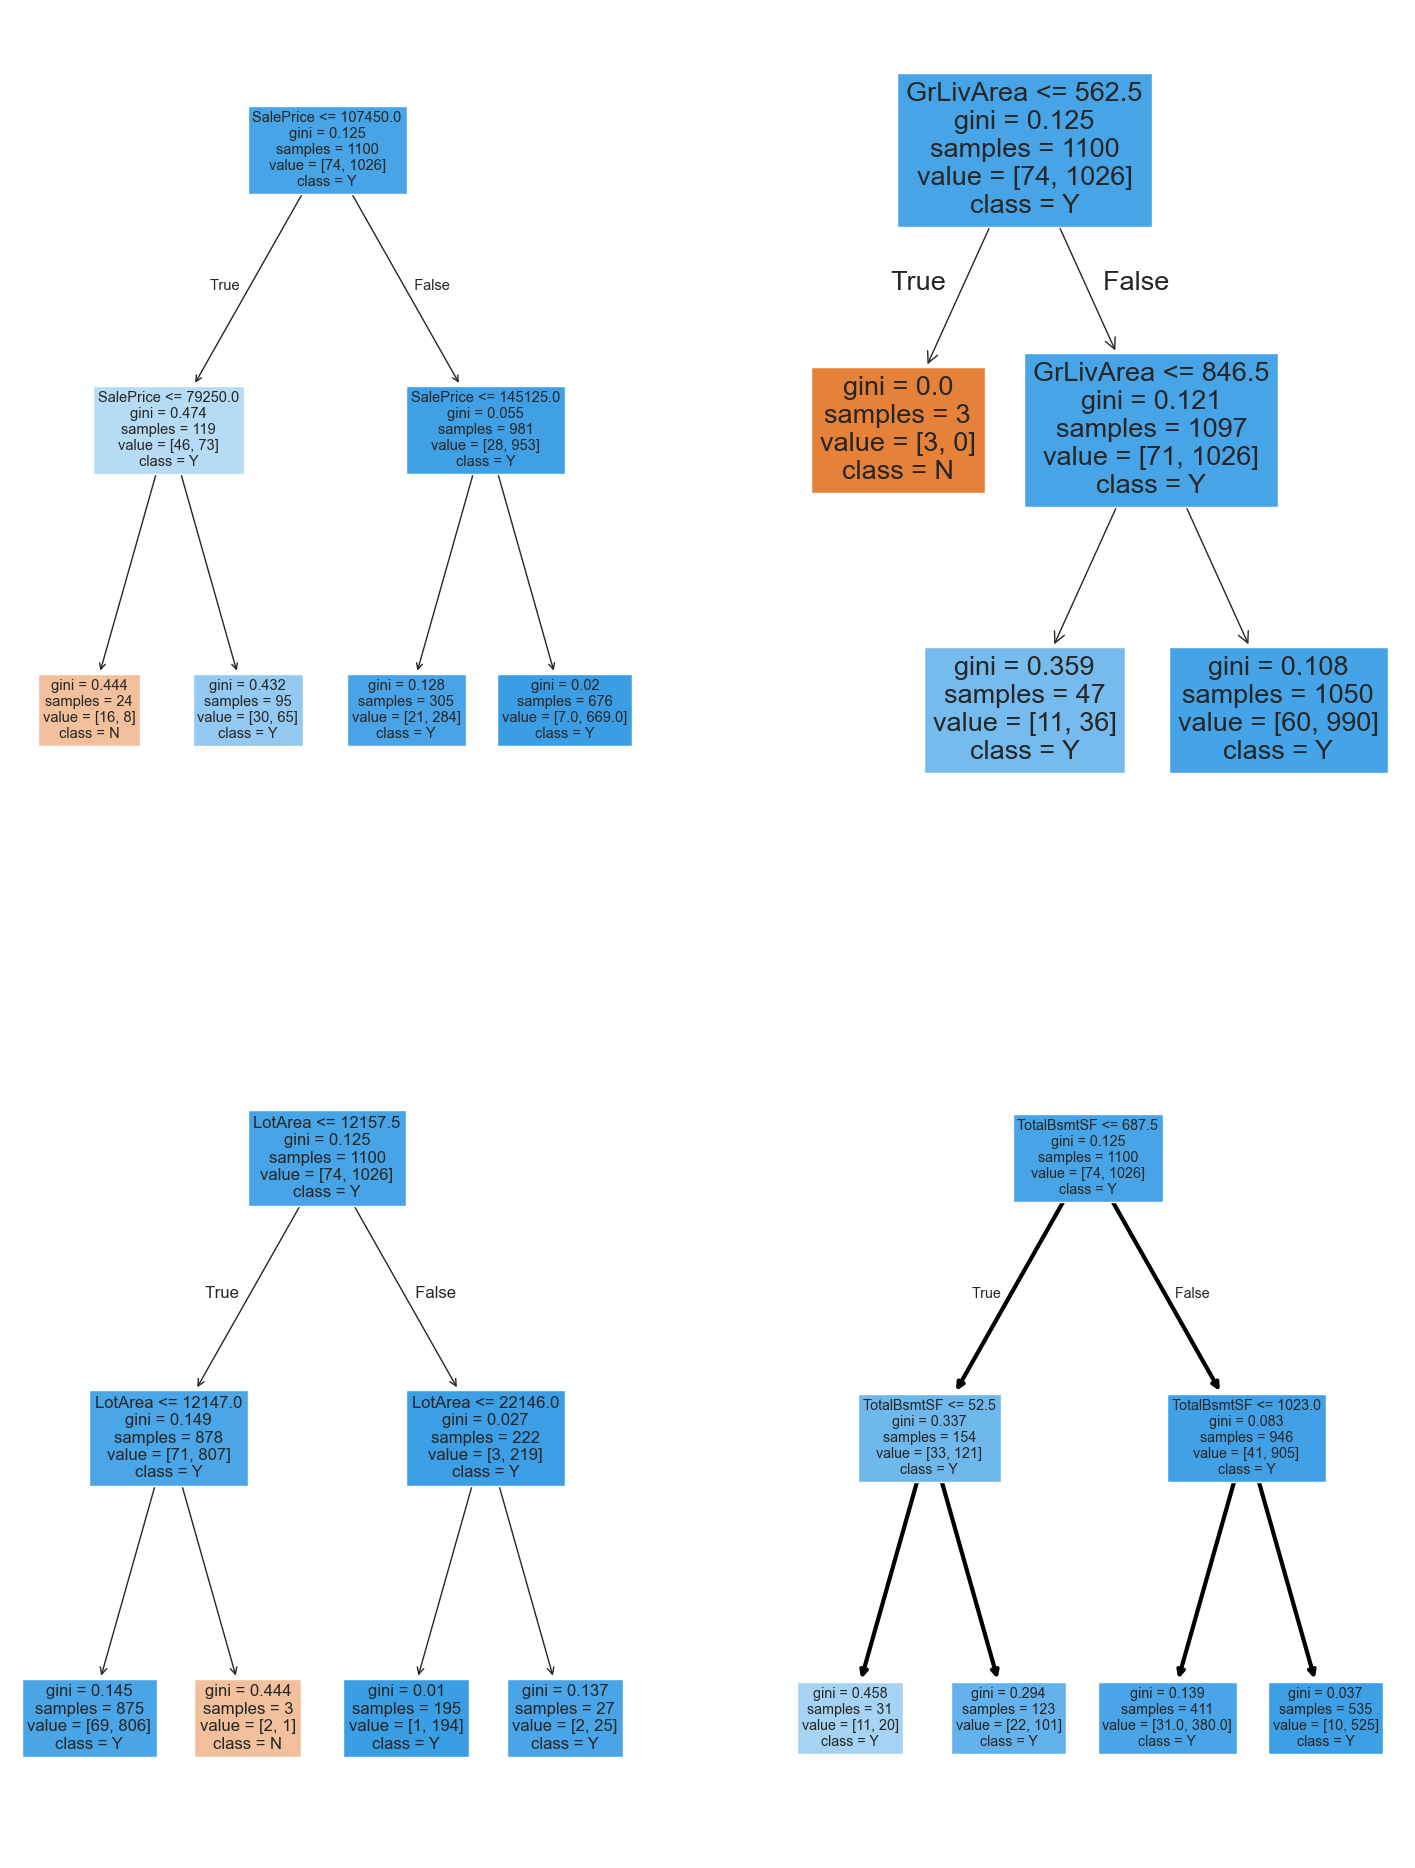

In [ ]:

f, axes = plt.subplots(2, 2, figsize=(18, 24))
out = plot_tree(dectreeSP, feature_names = XSP_train.columns.tolist(), class_names = [str(x) for x in dectreeSP.classes_], filled=True, ax=axes[0][0])
out = plot_tree(dectreeGLA, feature_names = XGLA_train.columns.tolist(), class_names = [str(x) for x in dectreeGLA.classes_], filled=True, ax=axes[0][1])
out = plot_tree(dectreeLA, feature_names = XLA_train.columns.tolist(), class_names = [str(x) for x in dectreeLA.classes_], filled=True, ax=axes[1][0])
out = plot_tree(dectreeTBSF, feature_names = XTBSF_train.columns.tolist(), class_names = [str(x) for x in dectreeTBSF.classes_], filled=True, ax=axes[1][1])

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Predict CentralAir for the train dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.
Predict CentralAir for the test dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.



 Sale Price
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.94

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9472222222222222



 Gr Liv Area
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9354545454545454

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9444444444444444



 Lot Area
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9336363636363636

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9416666666666667



 Total Basement SF
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9327272727272727

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9416666666666667



<Axes: >

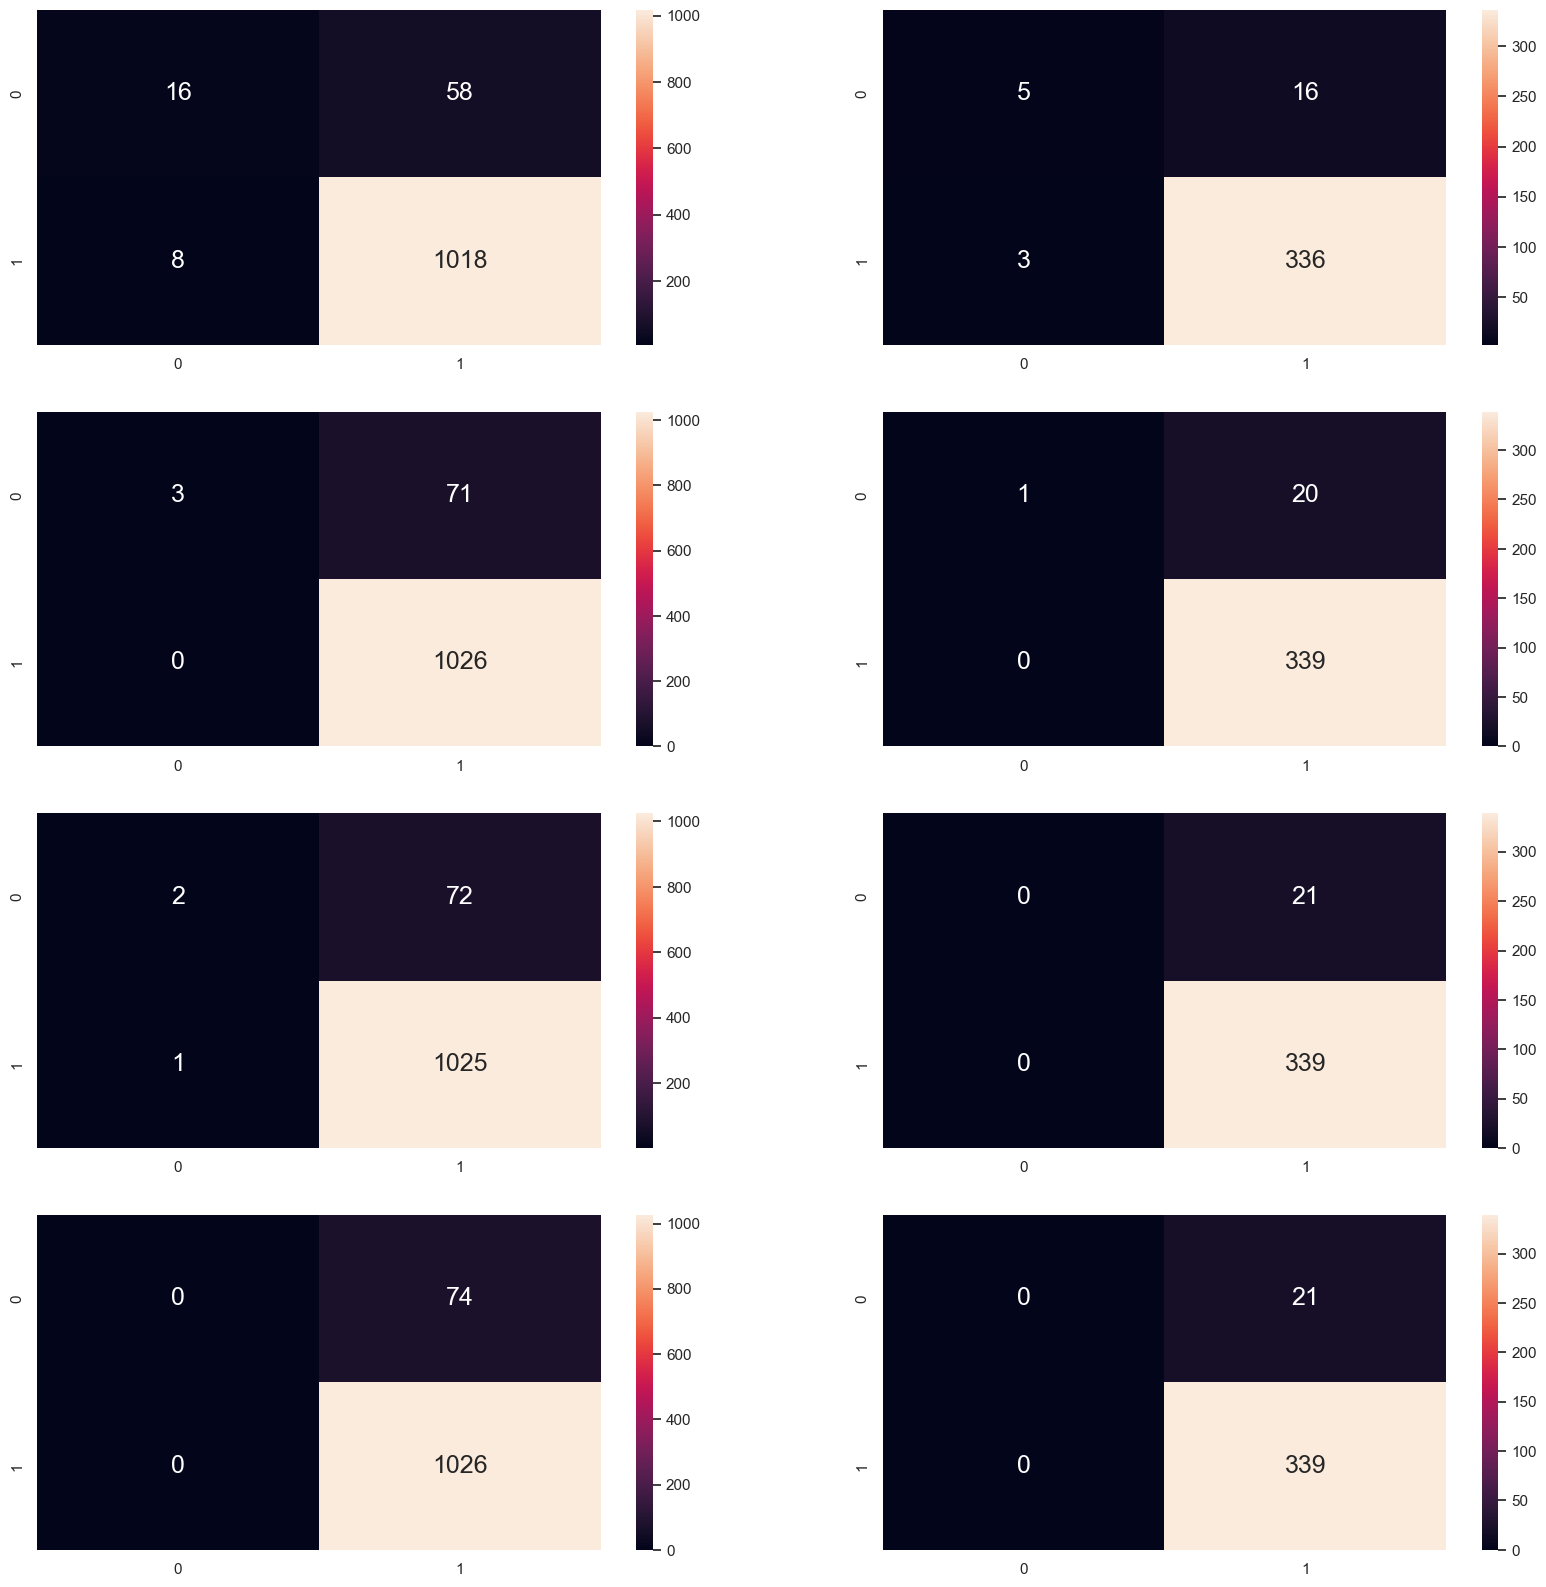

In [58]:
# Predict Legendary values corresponding to Total
y_train_pred_SP = dectreeSP.predict(XSP_train)
y_test_pred_SP = dectreeSP.predict(XSP_test)
y_train_pred_GLA = dectreeGLA.predict(XGLA_train)
y_test_pred_GLA = dectreeGLA.predict(XGLA_test)
y_train_pred_LA = dectreeLA.predict(XLA_train)
y_test_pred_LA = dectreeLA.predict(XLA_test)
y_train_pred_TBSF = dectreeTBSF.predict(XTBSF_train)
y_test_pred_TBSF = dectreeTBSF.predict(XTBSF_test)


print("\n\n Sale Price")
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreeSP.score(XSP_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreeSP.score(XSP_test, y_test))
print()

print("\n\n Gr Liv Area")
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreeGLA.score(XGLA_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreeGLA.score(XGLA_test, y_test))
print()

print("\n\n Lot Area")
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreeLA.score(XLA_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreeLA.score(XLA_test, y_test))
print()

print("\n\n Total Basement SF")
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectreeTBSF.score(XTBSF_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectreeTBSF.score(XTBSF_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(4, 2, figsize=(20, 20))
sb.heatmap(confusion_matrix(y_train, y_train_pred_SP),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_SP), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][1])
sb.heatmap(confusion_matrix(y_train, y_train_pred_GLA),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_GLA), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][1])
sb.heatmap(confusion_matrix(y_train, y_train_pred_LA),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[2][0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_LA), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[2][1])
sb.heatmap(confusion_matrix(y_train, y_train_pred_TBSF),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[3][0])
sb.heatmap(confusion_matrix(y_test, y_test_pred_TBSF), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[3][1])